<a href="https://colab.research.google.com/github/ramandeepsinghjmu/ramandeepsingh/blob/main/defective_vs_nondefective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing json file


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/             ##importing kaggle.json file

In [ ]:
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product   ##importing casting dataset from kaggle

 97% 97.0M/100M [00:05<00:00, 35.3MB/s]
100% 100M/100M [00:05<00:00, 17.8MB/s] 


In [ ]:
import zipfile             ##helps to unzip the zipped data
zip_ref = zipfile.ZipFile('/content/real-life-industrial-dataset-of-casting-product.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np                               ##import all python libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
## Feature scaling

Feature scaling

The ImageDataGenerator class in Keras provides a variety of transformations such as flipping, normalizing, etc.However, it becomes difficult to apply custom transformations that are not available in Keras.In our particular example, we will apply a denoising algorithm as a pre-processing transformation to our dataset


```
# This is formatted as code
```



In [ ]:

# The ImageDataGenerator class in Keras provides a variety of transformations such as flipping, normalizing, etc.
##However, it becomes difficult to apply custom transformations that are not available in Keras.
##In our particular example, we will apply a denoising algorithm as a pre-processing transformation to our dataset


In [ ]:
train_gen = ImageDataGenerator(rescale=1/255,
               horizontal_flip=True,
               zoom_range=0.2,
               shear_range=0.2   )
train_data = train_gen.flow_from_directory('/content/casting_data/casting_data/train',   ##import path of train data
                                          class_mode='binary',
                                          batch_size=8,
                                          target_size=(64,64),
                                          color_mode='grayscale')
test_gen = ImageDataGenerator(rescale=1/255)
test_data = test_gen.flow_from_directory('/content/casting_data/casting_data/test',      ##import path of test data
                                        class_mode='binary',
                                        batch_size=8,
                                        target_size=(64,64),
                                        color_mode='grayscale')

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


MODEL

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied toanalyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN),They have applications in image and video recognition, recommender systems, image classification, medical image analysis,natural language processing, brain-computer interfaces, and financial time serie

In [ ]:
# MODEL

In [ ]:
# In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to
#analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN),
#They have applications in image and video recognition, recommender systems, image classification, medical image analysis,
# natural language processing, brain-computer interfaces, and financial time serie

In [ ]:
Steps involved in This CNN Model

1 Convolution

2 Pooling

3 Flattening the image into 1D array

4 Nueral net

steps involved

1 Convolution

2 Pooling

3 Flattening the image into 1D array

4 Nueral net

In [ ]:
model = tf.keras.models.Sequential()
#convolution+pooling
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',input_shape=(64,64,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
#second layer
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(tf.keras.layers.Flatten())  #flattening the image into 1d array


#creating nueral network
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Training
#Training the model to get an output with good accuracy

In [ ]:
model.fit_generator(train_data,validation_data=test_data,epochs=10)

Epoch 1/10
  1/830 [..............................] - ETA: 47s - loss: 0.0051 - accuracy: 1.0000

<ipython-input-29-e3a401b0db86>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,validation_data=test_data,epochs=10)


830/830 [==============================] - 30s 36ms/step - loss: 0.0883 - accuracy: 0.9692 - val_loss: 0.1754 - val_accuracy: 0.9273
Epoch 2/10
830/830 [==============================] - 30s 36ms/step - loss: 0.0781 - accuracy: 0.9745 - val_loss: 0.1711 - val_accuracy: 0.9455
Epoch 3/10
830/830 [==============================] - 33s 40ms/step - loss: 0.0789 - accuracy: 0.9714 - val_loss: 0.1334 - val_accuracy: 0.9552
Epoch 4/10
830/830 [==============================] - 34s 40ms/step - loss: 0.0699 - accuracy: 0.9780 - val_loss: 0.1897 - val_accuracy: 0.9413
Epoch 5/10
830/830 [==============================] - 33s 40ms/step - loss: 0.0627 - accuracy: 0.9780 - val_loss: 0.1547 - val_accuracy: 0.9455
Epoch 6/10
830/830 [==============================] - 35s 43ms/step - loss: 0.0628 - accuracy: 0.9786 - val_loss: 0.1388 - val_accuracy: 0.9566
Epoch 7/10
830/830 [==============================] - 33s 39ms/step - loss: 0.0617 - accuracy: 0.9793 - val_loss: 0.2726 - val_accuracy: 0.9147
Epo

In [ ]:
 model.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# PREDICTION
# predicting a single image from test dataset

PREDICTION

Predicting a single image from test dataset

In [ ]:
test_image = image.load_img('/content/casting_data/casting_data/test/def_front/cast_def_0_1059.jpeg',target_size=(64,64),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

1/1 [==============================] - 0s 26ms/step


In [ ]:
result

array([[2.602181e-12]], dtype=float32)

In [ ]:
if result[0]<=0.5:
    print('Defective')
else :
    print('Not Defective')

Defective


In [ ]:
#visualization of the result

visualization of the result

In [ ]:
import cv2
img = cv2.imread('/content/casting_data/casting_data/test/def_front/cast_def_0_1059.jpeg',0)
img = img/255 #rescalinng
pred_img =img.copy()

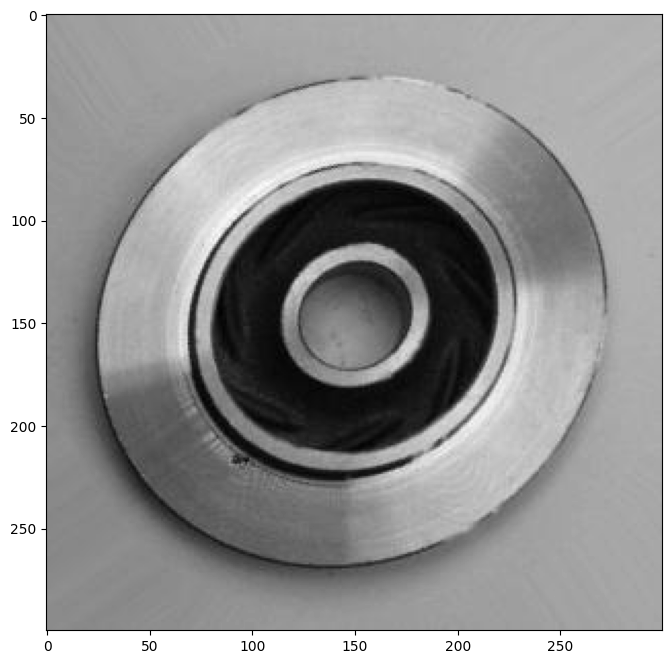

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
test_image = image.load_img('/content/casting_data/casting_data/test/ok_front/cast_ok_0_1001.jpeg',target_size=(64,64),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

1/1 [==============================] - 0s 101ms/step


In [ ]:
result

array([[0.9993807]], dtype=float32)

In [ ]:
if result[0]<=0.5:
    print('Defective')
else :
    print('Not Defective')

Not Defective


In [ ]:
import cv2
img = cv2.imread('/content/casting_data/casting_data/test/ok_front/cast_ok_0_1001.jpeg',0)
img = img/255 #rescalinng
pred_img =img.copy()

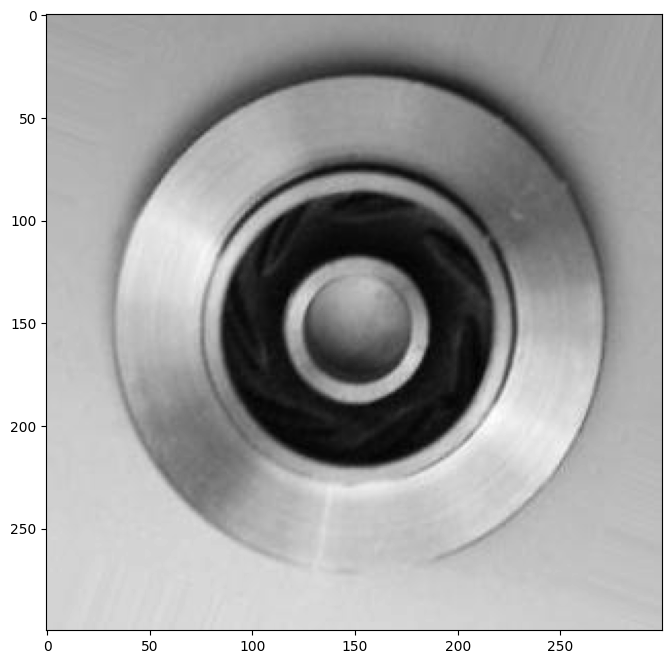

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')
plt.show()